  playlist_genre  loudness      mode  speechiness  acousticness  \
0            edm -5.485342  0.547325     0.080855      0.093174   
1          latin -6.060768  0.588384     0.096114      0.179676   
2            pop -6.095143  0.536634     0.076726      0.188934   
3            r&b -7.674685  0.521552     0.144754      0.305785   
4            rap -6.700864  0.522678     0.218939      0.204431   
5           rock -7.042250  0.577586     0.064947      0.174181   

   instrumentalness  liveness   valence       tempo  duration_ms  
0          0.171238  0.187785  0.408578  123.911593     3.761879  
1          0.051773  0.177817  0.567635  117.784975     3.527758  
2          0.049880  0.170853  0.492489  118.293675     3.588101  
3          0.036085  0.168233  0.441277  115.150198     3.723384  
4          0.052392  0.184438  0.424047  123.886045     3.444240  
5          0.117893  0.201316  0.425194  129.680991     4.213990  


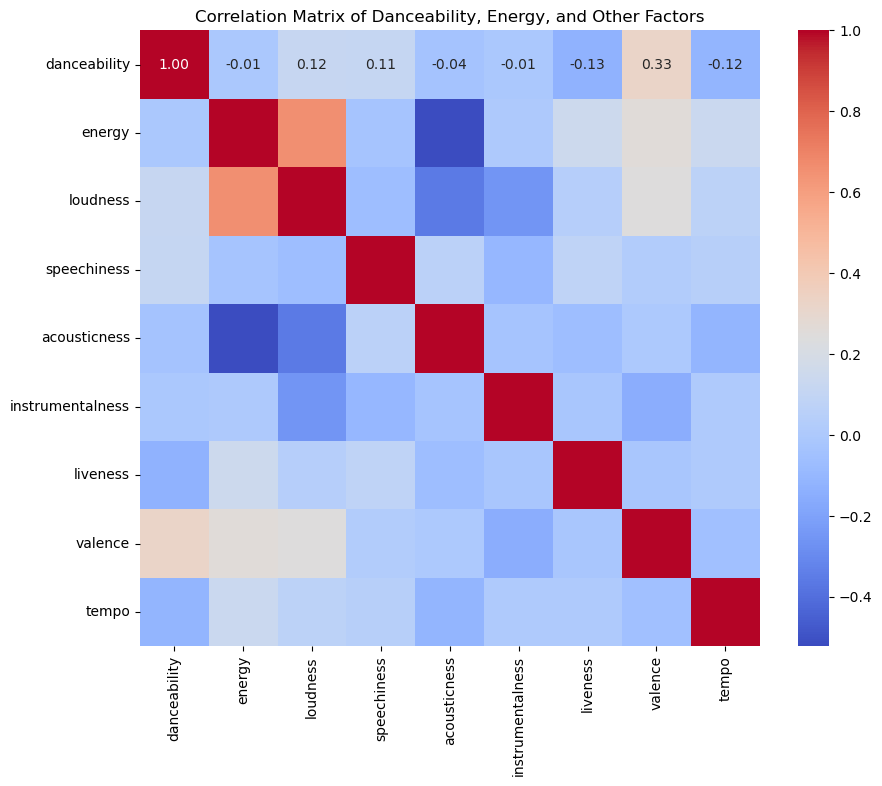

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
file_path = 'spotify.csv'
spotify_df = pd.read_csv(file_path)

# Convert the 'track_album_release_date' column to datetime format, handling mixed formats
spotify_df['track_album_release_date'] = pd.to_datetime(spotify_df['track_album_release_date'], format='mixed', errors='coerce')

# Filter the dataset for tracks released in 2017
spotify_2017 = spotify_df[spotify_df['track_album_release_date'].dt.year == 2017]

# Group the data by genre and calculate the average values for the specified columns
genre_averages = spotify_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000  # convert milliseconds to minutes
}).reset_index()

# Save the findings into a .csv file
output_path = 'spotify.csv'
genre_averages.to_csv(output_path, index=False)

# Display the calculated averages
print(genre_averages)

# Calculate correlations between danceability, energy, and other factors
correlation_matrix = spotify_2017[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Danceability, Energy, and Other Factors')
plt.show()
